* Authors: Andrea Jiménez Zuñiga e Isabel Afán de Ribera
* Date: 04/12/2020
* Institution: CUNEF

# 04. Support Vector Machine (SVM)

To validate our model is necessary to split the data set in a training and test set. To do this, the data is randomly divided by applying 80% of the observations to training and the remaining 20% to test.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import itertools
import pickle
from sklearn import metrics  
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

* __Reading the Data File__ 

In [5]:
data_path = '../data/Engineering_loans_final_3.csv'
loans = pd.read_csv(data_path)
loans

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,loan_status,home_ownership,purpose,grade,sub_grade,verification_status
0,-0.598017,-0.358869,-0.324389,-1.326914,1.171580,-0.024876,-1.280531,-0.348224,1.201397,1.496916,...,-0.373774,-0.165271,-0.136688,2.147209,1.0,2.0,1.0,0.0,3.0,0.0
1,-0.598017,-0.871890,-0.614953,2.544662,-0.387948,-1.181062,1.913435,-0.572315,-0.377537,-1.427104,...,-0.373774,-1.402368,-0.136688,-0.371165,1.0,3.0,2.0,4.0,22.0,1.0
2,-0.598017,-0.836712,-0.823949,-1.326914,0.520515,0.264170,-1.091911,0.316323,-0.377537,1.314164,...,-0.373774,-0.603693,-0.136688,-0.371165,1.0,1.0,2.0,0.0,3.0,0.0
3,1.672193,-0.543557,-0.782474,0.591176,-0.357984,0.264170,-1.393703,-0.474730,2.780331,0.583159,...,-0.373774,-0.944687,-0.136688,4.665582,1.0,3.0,2.0,2.0,14.0,1.0
4,-0.598017,-0.074509,0.201280,0.591176,-0.009422,0.264170,1.540387,-0.610936,-0.377537,-1.427104,...,0.716149,-0.859722,-0.136688,-0.371165,1.0,1.0,2.0,2.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462186,-0.598017,-0.358869,-0.145256,0.496045,-0.760418,1.131309,0.492498,0.088101,-0.377537,-0.513348,...,-0.373774,0.977797,-0.136688,-0.371165,1.0,3.0,1.0,3.0,15.0,2.0
462187,-0.598017,-0.309033,-0.169311,-0.300393,-0.191114,-1.470109,0.689501,0.215820,-0.377537,0.217657,...,0.716149,0.593754,-0.136688,-0.371165,0.0,1.0,1.0,1.0,9.0,2.0
462188,1.672193,-0.191771,-0.494991,0.584539,-0.615064,-0.313923,0.337410,-0.236808,1.201397,-0.513348,...,-0.373774,1.410555,-0.136688,2.147209,0.0,3.0,2.0,3.0,16.0,2.0
462189,1.672193,-0.309033,-0.487920,1.469470,-0.169917,-1.470109,-0.949398,-0.361517,-0.377537,0.948662,...,0.716149,0.990259,-0.136688,-0.371165,0.0,3.0,2.0,4.0,22.0,1.0


In [3]:
#loans = loans.iloc[:,1:500]
#loans.head()

* __Splitting the data into train and test set__

In [6]:
X = loans.drop(['loan_status'], axis = 1).values
y = loans['loan_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

* __Fitting the model and Prediction__

In [7]:
%%time
param_test3 = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
model_SVM = GridSearchCV(estimator=SVC(max_iter = 1000),
             param_grid= param_test3 , scoring='roc_auc', n_jobs=-1, iid=False, cv=5)
model_SVM.fit(X_train, y_train)

CPU times: user 40.9 s, sys: 762 ms, total: 41.7 s
Wall time: 5min 40s


GridSearchCV(cv=5, estimator=SVC(max_iter=1000), iid=False, n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             scoring='roc_auc')

In [8]:
model_SVM.best_estimator_

SVC(C=1, max_iter=1000)

In [9]:
%%time
model_SVM2 = model_SVM.best_estimator_
model_SVM2.fit(X_train, y_train)

CPU times: user 41.1 s, sys: 377 ms, total: 41.4 s
Wall time: 41.7 s


SVC(C=1, max_iter=1000)

Next, we make the predictions using the subset above, which is the test set.

In [10]:
y_pred_model_SVM2 = model_SVM2.predict(X_test)
print(y_pred_model_SVM2)

[1. 1. 1. ... 1. 1. 1.]


* __Accuracy__

In [11]:
accuracy_score(y_test, y_pred_model_SVM2)

0.7159640411514621

In this case we can see that the hits were 71,5%.

## Model Evaluation

* __Confussion Matrix__

In order to be able to illustrate the confusion matrix, a function called plot_confusion_matrix has been defined, indicating the parameters to be taken into account.

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We proceed to graph the confussion matrix:

Confusion matrix, without normalization
[[ 8153 15283]
 [10973 58030]]


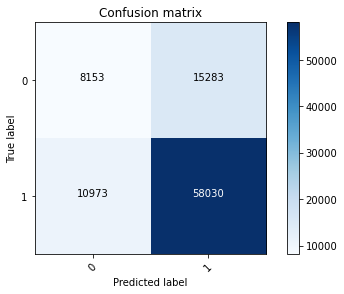

In [13]:
cnf_matrix = confusion_matrix(y_test, y_pred_model_SVM2)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [14]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_model_SVM2).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  8153
False Positives:  15283
False Negatives:  10973
True Positives:  58030


With the confusion matrix we can see that there are 58.030 true positives in total, which means that those loans that have been classified as fully paid are correctly placed.

On the other hand, we can see that there are 10.973 true negatives in total, which means that those loans that have been classified as not paid are correctly placed.

It can be seen as well, that there is a total of 15.283 and 10.973 false positives and false negatives, respectively. This means that these loans have been misplaced.

* __Normalized Confussion Matrix__

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.3478836  0.6521164 ]
 [0.15902207 0.84097793]]


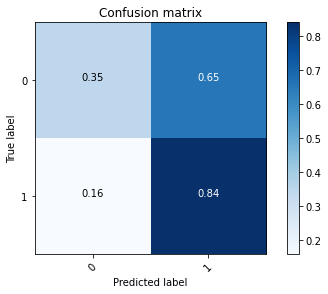

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred_model_SVM2)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [17]:
model_SVM2.score(X_test, y_test)

0.7159640411514621

* __Precision, Accuracy, Recall, F1-score and Support__

In [18]:
print('SVM')
print(classification_report(y_test,y_pred_model_SVM2))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(model_SVM2.score(X_test, y_test)))
print('')

SVM
              precision    recall  f1-score   support

         0.0       0.43      0.35      0.38     23436
         1.0       0.79      0.84      0.82     69003

    accuracy                           0.72     92439
   macro avg       0.61      0.59      0.60     92439
weighted avg       0.70      0.72      0.71     92439

Accuracy of SVM classifier on test set: 0.72



* __ROC Curve__

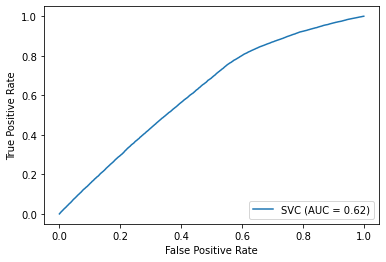

Support Vector Machine score train:  0.7160421038966659
Support Vector Machine score:  0.7159640411514621


In [19]:
metrics.plot_roc_curve(model_SVM2, X_test, y_test)
plt.show()                     
print("Support Vector Machine score train: ", model_SVM2.score(X_train, y_train))
print("Support Vector Machine score: ", model_SVM2.score(X_test, y_test))

* **Errors**

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_model_SVM2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_model_SVM2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model_SVM2)))

Mean Absolute Error: 0.28403595884853794
Mean Squared Error: 0.28403595884853794
Root Mean Squared Error: 0.5329502404995592


* __Saving the model__ 

In [26]:
model = model_SVM2
filename = 'svm_model.pkl'
pickle.dump(model,open(filename,'wb'))